# Generate Signal

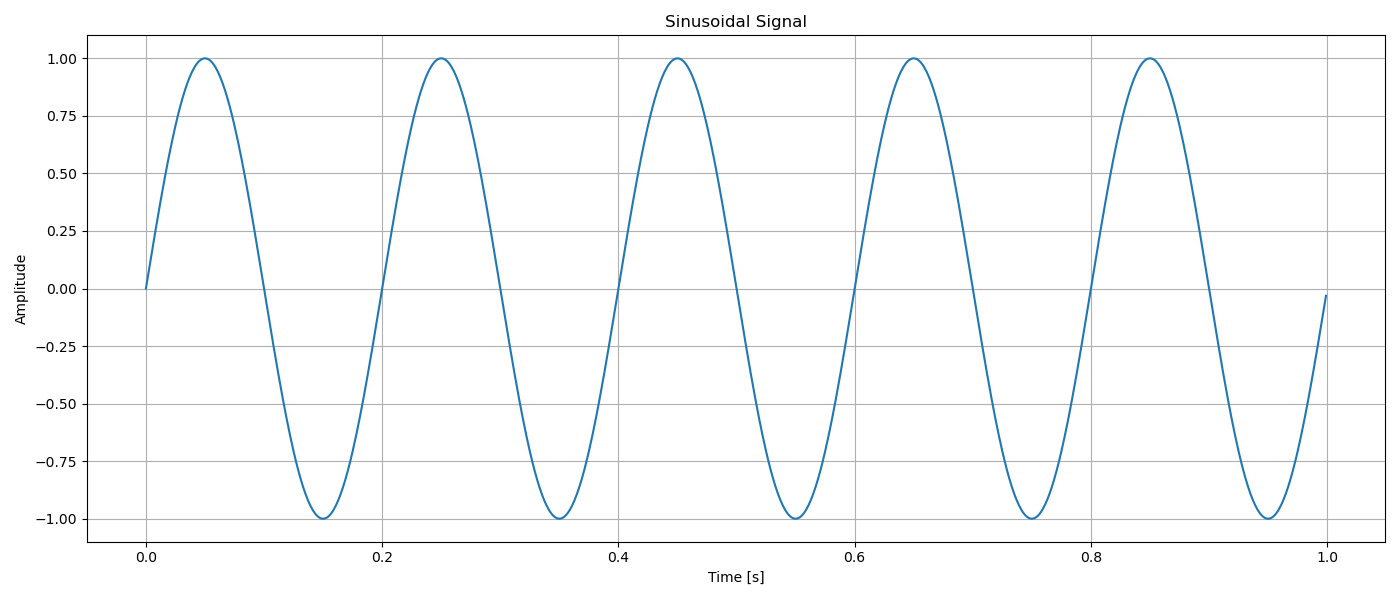

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt

# Parameters
amplitude = 1.0      # Amplitude of the sine wave
frequency = 5.0      # Frequency in Hz
phase = 0            # Phase in radians
sampling_rate = 1000 # Samples per second
duration = 1.0       # Duration in seconds

# Time vector
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Sinusoidal signal
signal = amplitude * np.sin(2 * np.pi * frequency * t + phase)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(t, signal)
plt.title("Sinusoidal Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Continuous vs Discreet Signals

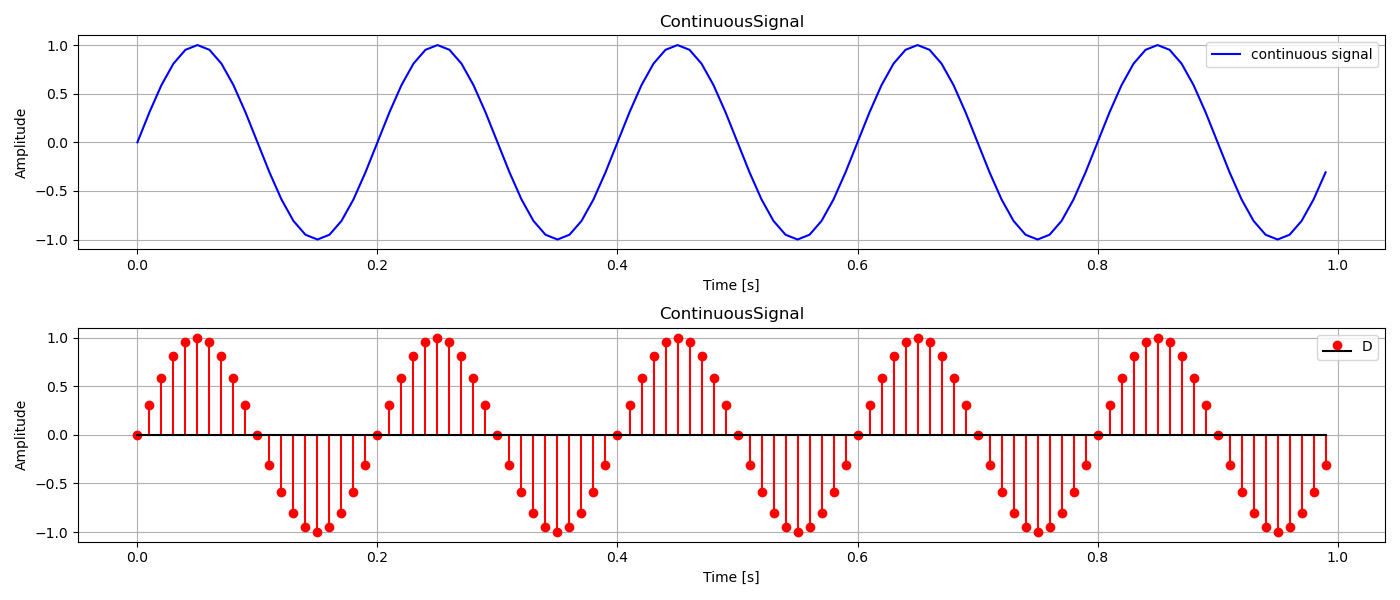

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
amplitude = 1.0      # Amplitude of the sine wave
frequency = 5.0      # Frequency in Hz
phase = 0            # Phase in radians
sampling_rate = 100 # Samples per second
duration = 1.0       # Duration in seconds

# Time vector
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Sinusoidal signal
signal = amplitude * np.sin(2 * np.pi * frequency * t + phase)
# Plotting
plt.figure(figsize=(14, 6))
plt.subplot(2,1, 1)
#plt.figure(figsize=(14, 6))
plt.plot(t, signal, label= 'continuous signal', color='blue')
plt.title("ContinuousSignal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.subplot(2,1, 2)
#plt.figure(figsize=(14, 6))
plt.stem(t, signal, linefmt = 'r', markerfmt='ro', basefmt='k', use_line_collection=True)
plt.title("ContinuousSignal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend('Discreet Signal')

plt.tight_layout()
plt.show()

# Determine the frequency components of the signal

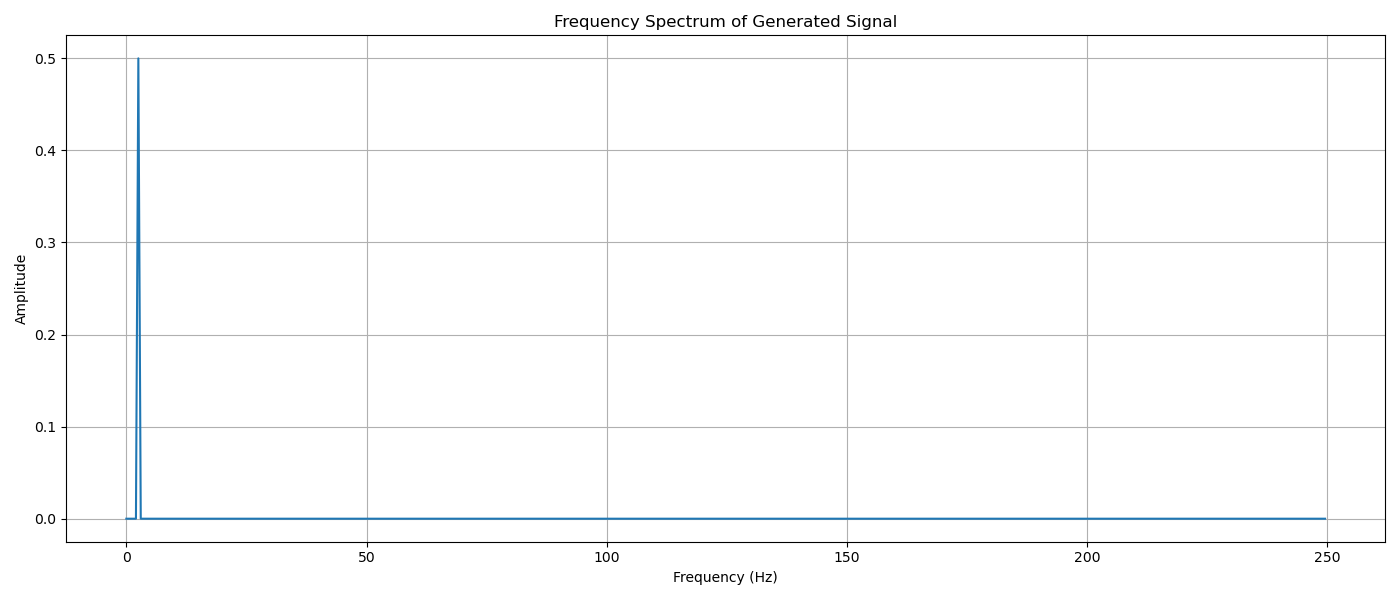

Frequency: 2.50 Hz, Amplitude: 0.5000


In [11]:
# Perform FFT
N = len(signal)
fft_vals = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(N, 1/fs)

# Keep only positive frequencies
mask = fft_freqs >= 0
fft_freqs = fft_freqs[mask]
amplitude = np.abs(fft_vals[mask]) / N  # Normalize amplitude

# Plot frequency spectrum
plt.figure(figsize=(14, 6))
plt.plot(fft_freqs, amplitude)
plt.title("Frequency Spectrum of Generated Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print frequency components and their amplitudes
for f, a in zip(fft_freqs, amplitude):
    if a > 0.02:  # Filter out very small amplitudes (optional)
        print(f"Frequency: {f:.2f} Hz, Amplitude: {a:.4f}")

# Mixing Different Signals

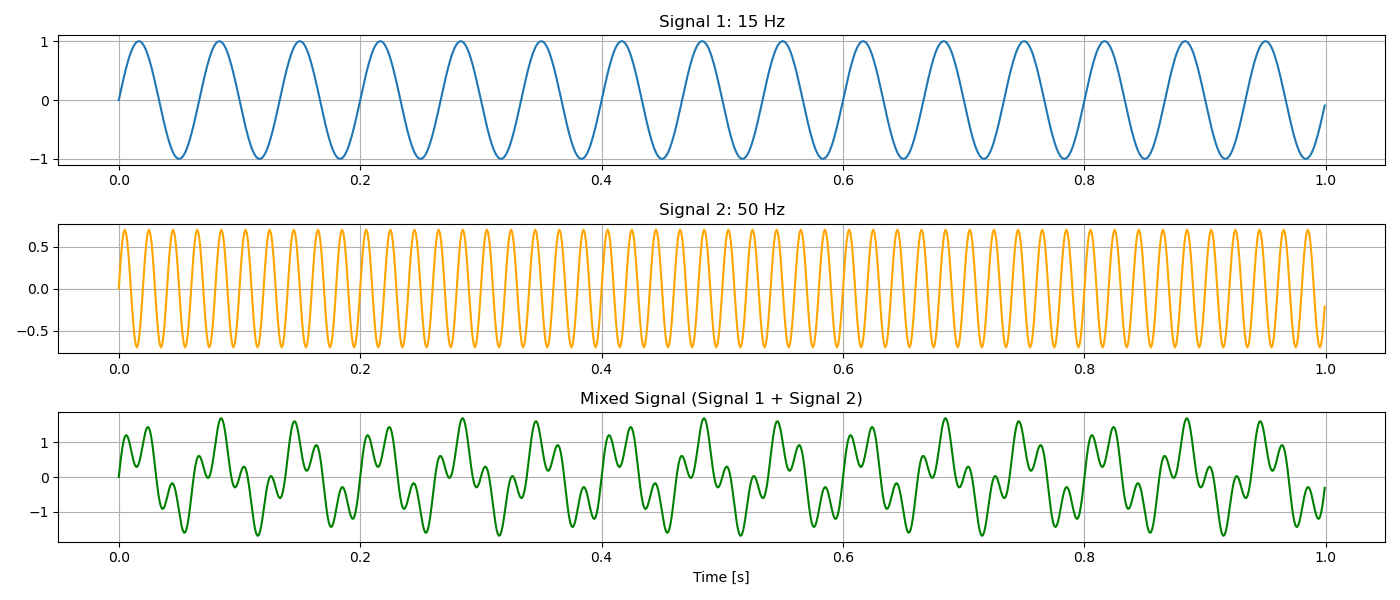

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
duration = 1.0        # seconds
sampling_rate = 1000  # Hz
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Define two signals
freq1 = 15   # Hz
freq2 = 50  # Hz

#Amplitudes
amplitude1 = 1
amplitude2 = 0.7

signal1 = amplitude1*np.sin(2 * np.pi * freq1 * t)
signal2 = amplitude2*np.sin(2 * np.pi * freq2 * t)

# Mixed signal
mixed_signal = signal1 + signal2

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(3, 1, 1)
plt.plot(t, signal1, label=f'{freq1} Hz')
plt.title(f'Signal 1: {freq1} Hz')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, signal2, label=f'{freq2} Hz', color='orange')
plt.title(f'Signal 2: {freq2} Hz')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, mixed_signal, label='Mixed Signal', color='green')
plt.title('Mixed Signal (Signal 1 + Signal 2)')
plt.xlabel('Time [s]')
plt.grid(True)

plt.tight_layout()
plt.show()


# Sampling Rate and Its Effects

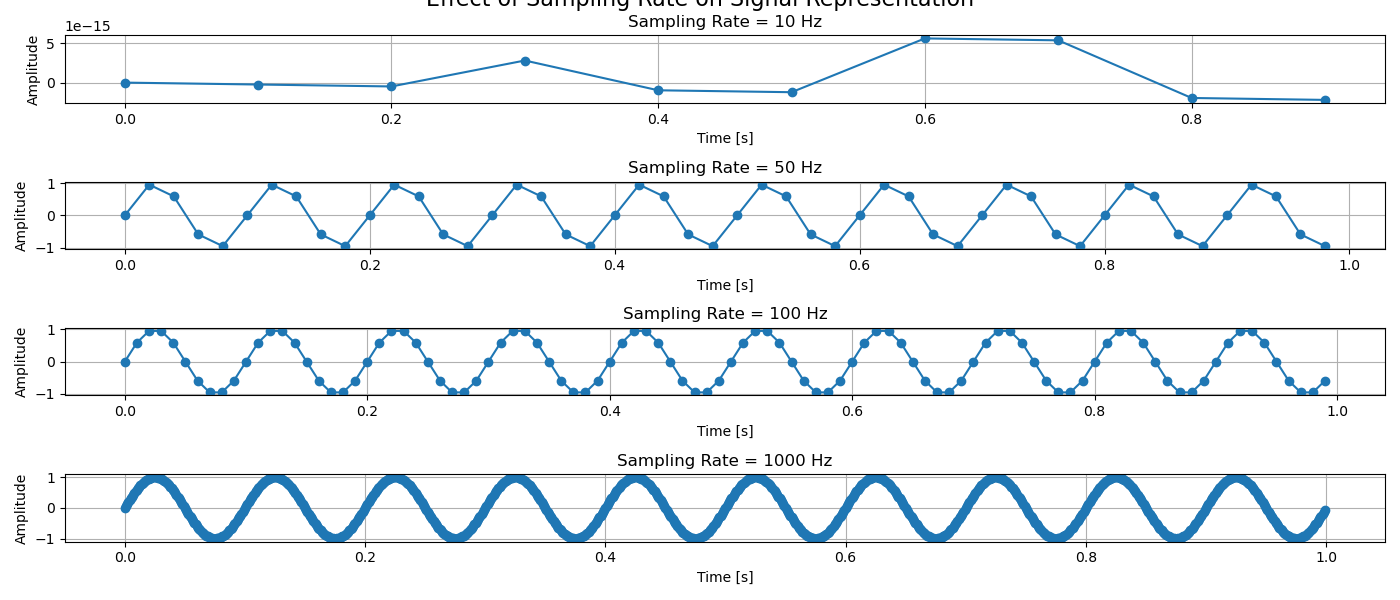

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
frequency = 10  # Hz (sine wave frequency)
duration = 1.0  # seconds

# Define multiple sampling rates
sampling_rates = [10, 50, 100, 1000]  # Hz

# Plotting the time domain

plt.figure(figsize=(14, 6))

for i, fs in enumerate(sampling_rates, 1):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    signal = np.sin(2 * np.pi * frequency * t)

    plt.subplot(len(sampling_rates), 1, i)
    plt.plot(t, signal, marker='o')
    plt.title(f"Sampling Rate = {fs} Hz")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Effect of Sampling Rate on Signal Representation", fontsize=16, y=1.02)
plt.show()

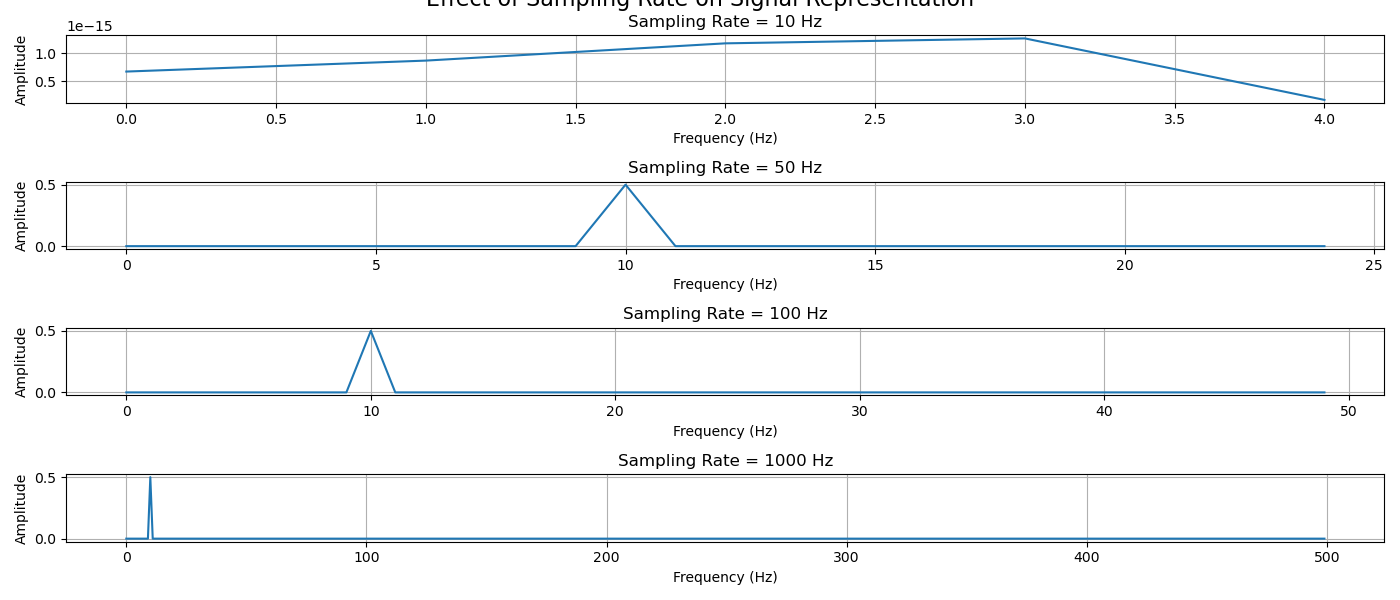

In [14]:
# Plotting the frequency spectrum
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
frequency = 10  # Hz (sine wave frequency)
duration = 1.0  # seconds

# Define multiple sampling rates
sampling_rates = [10, 50, 100, 1000]  # Hz

plt.figure(figsize=(14, 6))
for i, fs in enumerate(sampling_rates, 1):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    signal = np.sin(2 * np.pi * frequency * t)

    # Perform FFT
    N = len(signal)
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, 1/fs)

    # Keep only positive frequencies
    mask = fft_freqs >= 0
    fft_freqs = fft_freqs[mask]
    amplitude = np.abs(fft_vals[mask]) / N  # Normalize amplitude

    # Plot frequency spectrum
    plt.subplot(len(sampling_rates), 1, i)
    plt.plot(fft_freqs, amplitude)
    plt.title(f"Sampling Rate = {fs} Hz")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Effect of Sampling Rate on Signal Representation", fontsize=16, y=1.02)
plt.show()

# Bandwidth Calculation

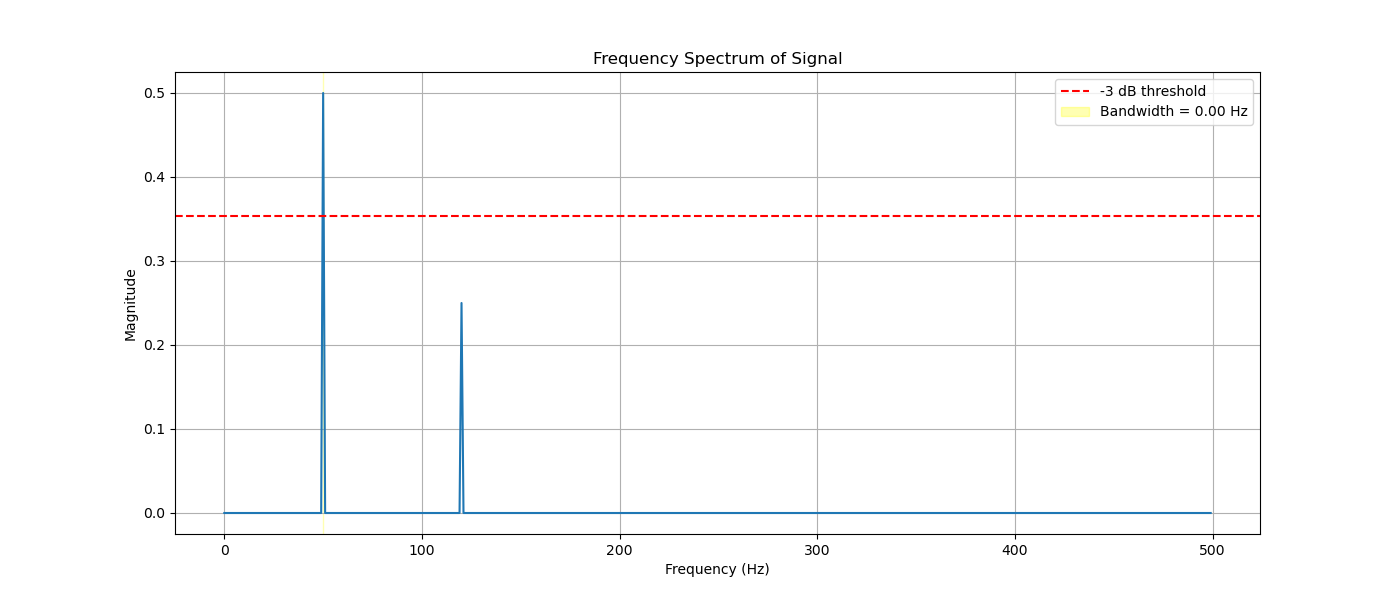

Estimated bandwidth of the signal: 0.00 Hz


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample signal (e.g., sum of sinusoids)
fs = 1000  # Sampling frequency in Hz
t = np.arange(0, 1.0, 1/fs)  # Time vector

# Create a signal with multiple frequency components
signal = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*120*t)

# Compute FFT and frequency axis
n = len(signal)
freq = np.fft.fftfreq(n, d=1/fs)
fft_signal = np.fft.fft(signal)
fft_magnitude = np.abs(fft_signal) / n

# Only keep the positive half of the spectrum
positive_freqs = freq[:n//2]
positive_magnitude = fft_magnitude[:n//2]

# Determine bandwidth - threshold (e.g., 3 dB down from max)
threshold = np.max(positive_magnitude) / np.sqrt(2)
significant_indices = np.where(positive_magnitude >= threshold)[0]

bandwidth = positive_freqs[significant_indices[-1]] - positive_freqs[significant_indices[0]]

# Plot the spectrum
plt.figure(figsize=(14, 6))
plt.plot(positive_freqs, positive_magnitude)
plt.title("Frequency Spectrum of Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.axhline(threshold, color='r', linestyle='--', label='-3 dB threshold')
plt.axvspan(positive_freqs[significant_indices[0]],
            positive_freqs[significant_indices[-1]], color='yellow', alpha=0.3,
            label=f'Bandwidth = {bandwidth:.2f} Hz')
plt.legend()
plt.grid(True)
plt.show()

print(f"Estimated bandwidth of the signal: {bandwidth:.2f} Hz")

# Noise and Its Effects

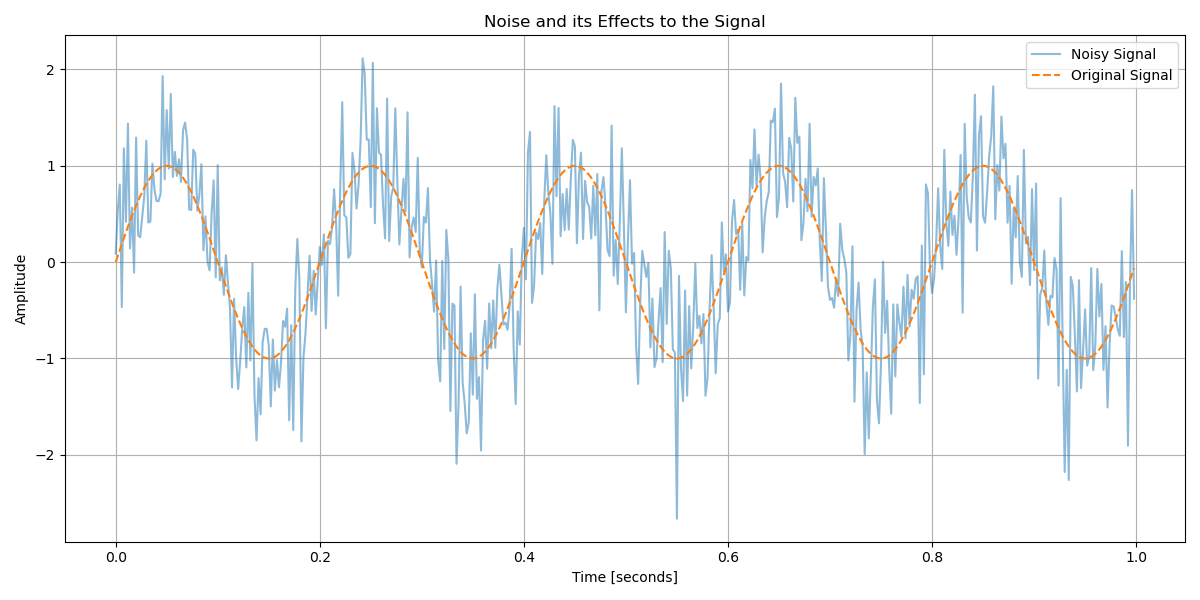

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Generate a sample signal: sine wave + noise
fs = 500  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)
clean_signal = np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave
noise = np.random.normal(0, 0.5, t.shape)
noisy_signal = clean_signal + noise

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.5)
plt.plot(t, clean_signal, label='Original Signal', linestyle='--')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.title('Noise and its Effects to the Signal')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

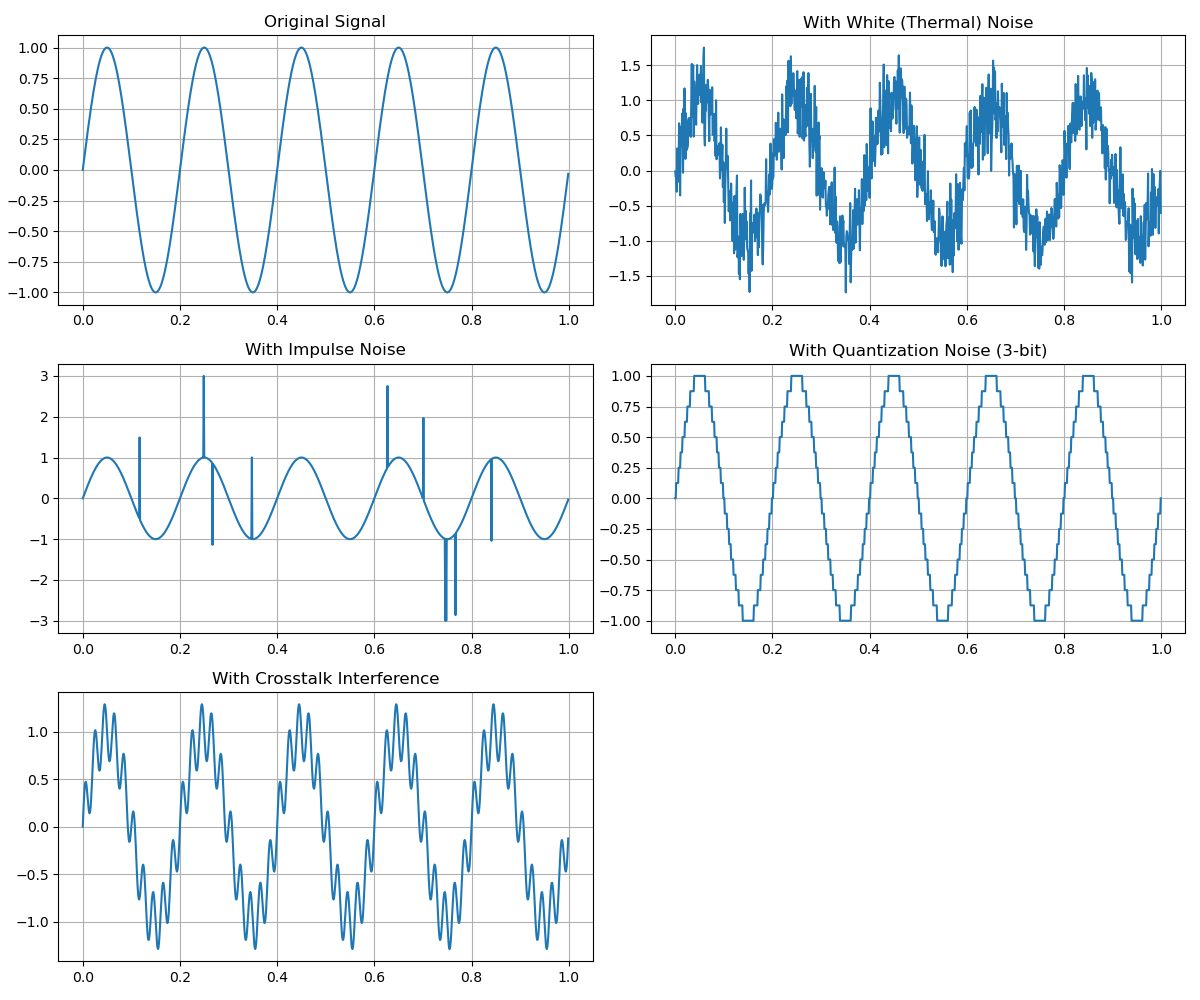

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Create time axis
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)

# Original signal (clean sine wave)
freq = 5  # Hz
signal = np.sin(2 * np.pi * freq * t)

# 1. Add White (Thermal) Noise
white_noise = np.random.normal(0, 0.3, size=t.shape)
signal_white_noise = signal + white_noise

# 2. Add Impulse Noise (random spikes)
impulse_noise = np.zeros_like(signal)
impulse_indices = np.random.randint(0, fs, size=10)
impulse_noise[impulse_indices] = np.random.choice([2, -2], size=10)
signal_impulse_noise = signal + impulse_noise

# 3. Add Quantization Noise (simulate by reducing resolution)
def quantize(signal, bits):
    levels = 2 ** bits
    return np.round(signal * levels) / levels

signal_quantized = quantize(signal, 3)  # 3-bit quantization
quantization_noise = signal_quantized - signal

# 4. Add Crosstalk (interfering signal from another channel)
interfering_signal = 0.3 * np.sin(2 * np.pi * 50 * t)  # Higher freq interference
signal_crosstalk = signal + interfering_signal

# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(t, signal)
plt.title("Original Signal")
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(t, signal_white_noise)
plt.title("With White (Thermal) Noise")
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(t, signal_impulse_noise)
plt.title("With Impulse Noise")
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(t, signal_quantized)
plt.title("With Quantization Noise (3-bit)")
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(t, signal_crosstalk)
plt.title("With Crosstalk Interference")
plt.grid(True)

plt.tight_layout()
plt.show()


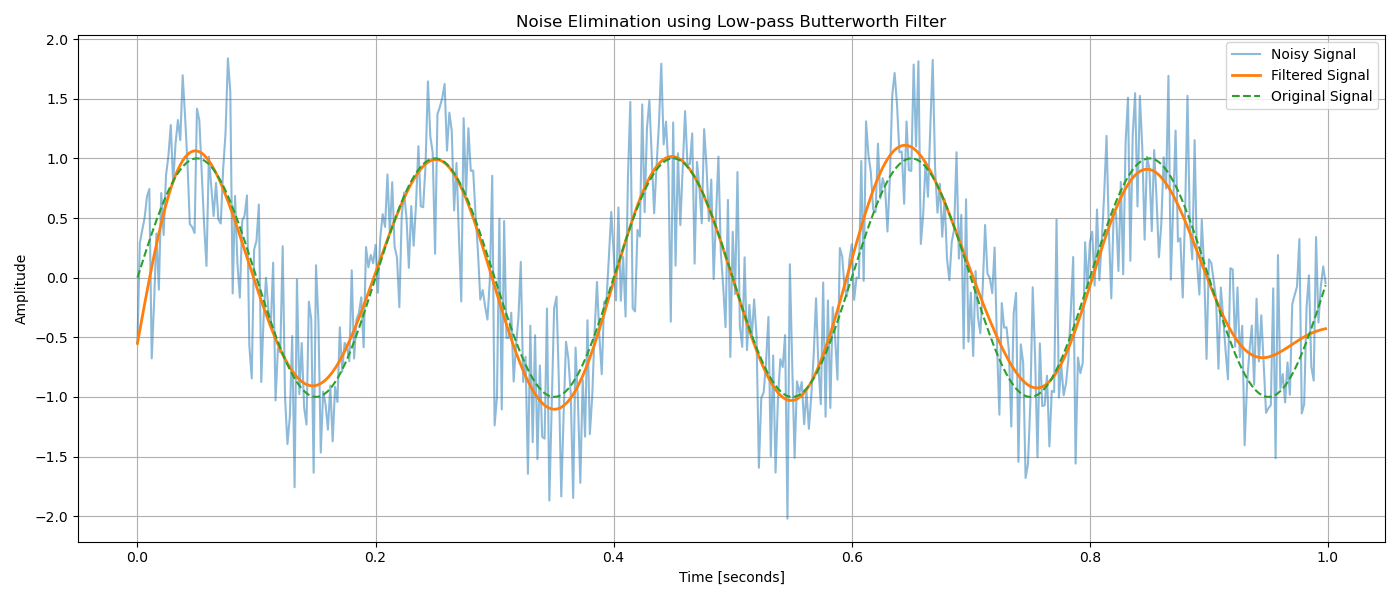

In [17]:
#Applying filter to recover the original signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Generate a sample signal: sine wave + noise
fs = 500  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)
clean_signal = np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave
noise = np.random.normal(0, 0.5, t.shape)
noisy_signal = clean_signal + noise

# Butterworth low-pass filter design
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Apply the filter
cutoff_frequency = 10  # Hz
filtered_signal = butter_lowpass_filter(noisy_signal, cutoff_frequency, fs)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.5)
plt.plot(t, filtered_signal, label='Filtered Signal', linewidth=2)
plt.plot(t, clean_signal, label='Original Signal', linestyle='--')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.title('Noise Elimination using Low-pass Butterworth Filter')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Saving data

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Signal parameters
fs = 1000  # Sampling frequency (Hz)
duration = 60  # 1 minute
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Generate 5 Hz sine wave + Gaussian noise
signal_freq = 5
clean_signal = np.sin(2 * np.pi * signal_freq * t)
noise = np.random.normal(0, 0.5, t.shape)
noisy_signal = clean_signal + noise

# Normalize to 16-bit PCM range
noisy_signal_normalized = noisy_signal / np.max(np.abs(noisy_signal))
noisy_signal_int16 = np.int16(noisy_signal_normalized * 32767)

# Save to WAV file
wavfile.write("noisy_signal.wav", fs, noisy_signal_int16)

print("Saved 'noisy_signal.wav'")

Saved 'noisy_signal.wav'
